In [9]:
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import math

In [8]:
X = 0

In [7]:
def confronta(s, pos, Sequence):
  global X
  sequenceMin = []
  sequenceMax = []
  for i in range(len(Sequence)):
    if(i != pos):
      if Sequence[i] < s:
        sequenceMin.append(Sequence[i])
        X += 1
      else:
        sequenceMax.append(Sequence[i])
        X += 1
  return [sequenceMin, sequenceMax]

In [6]:
def LVQuickSort(Sequence):
  if(len(Sequence) <= 1): return Sequence
  pos = random.randint(0, len(Sequence)-1)
  s = Sequence[pos]
  confronto = confronta(s, pos, Sequence)
  sequenceMin = LVQuickSort(confronto[0])
  sequenceMax = LVQuickSort(confronto[1])

  # necessario per avere in output un array senza troncamenti
  sorted_sequence = sequenceMin
  sorted_sequence.extend([s]) # la funzione extend concatena
  sorted_sequence.extend(sequenceMax)

  return sorted_sequence

In [5]:
def random_array(n):
  arr = []
  for i in range(n):
    arr.append(random.randint(0, n))  
  return arr

In [26]:
n = 10**4
R = 10**5
Xr = []

In [28]:
for i in tqdm(range(R)):
  array = random_array(n)
  X = 0
  LVQuickSort(array)
  Xr.append(X)


 71%|███████   | 70869/100000 [24:39<10:07, 47.95it/s]

In [16]:
print(Xr)

[155099, 169298, 148343, 159857, 176716, 153109, 163113, 162560, 157643, 152671, 158856, 158122, 154296, 157282, 150292, 153245, 145932, 152059, 150955, 164286, 154054, 155760, 160469, 168911, 159316, 155414, 159290, 165884, 143705, 152313, 157522, 162373, 154782, 168715, 149539, 155864, 161465, 166628, 150567, 155690, 156521, 148613, 152611, 149336, 153051, 156073, 168225, 148119, 146809, 163001, 164270, 151254, 172680, 162636, 148109, 146649, 160067, 150152, 150812, 152408, 146213, 150928, 152520, 162606, 150784, 159754, 167149, 155550, 147888, 148860, 150607, 153242, 151209, 157521, 173372, 156132, 163783, 151881, 158779, 155175, 147010, 165565, 150047, 162549, 158753, 155145, 153672, 180580, 162644, 147524, 150317, 153489, 149959, 161140, 161918, 153366, 155303, 156043, 157187, 153583]


In [17]:
def valore_medio(R,Xr):
  sommatoria = sum(Xr)
  return (1/R) * sommatoria

In [18]:
def deviazione_standard(R,Xr,u):
  sommatoria = 0
  for i in Xr:
    sommatoria += ((i-u)**2)
  return (1/(R-1)) * sommatoria

In [19]:
val_medio = valore_medio(R,Xr)
dev_standard = deviazione_standard(R,Xr,val_medio)

In [22]:
k = 0
for x in Xr:
    if x >= 2*val_medio and x < 3*val_medio:
        k += 1
print(k)

0


In [24]:
print("Frequenza empirica di X: ", k/R)

Frequenza empirica di X:  0.0


In [23]:
k = 0
for x in Xr:
    if x >= 3*val_medio:
        k += 1
print(k)

0


In [25]:
print("Frequenza empirica di X: ", k/R)

Frequenza empirica di X:  0.0


In [21]:
print("Valore medio: " + str(val_medio))
print("Varianza: " + str(dev_standard))
print("Deviazione standard: " + str(math.sqrt(dev_standard)))

Valore medio: 156531.38
Varianza: 51463204.21777777
Deviazione standard: 7173.785905487964


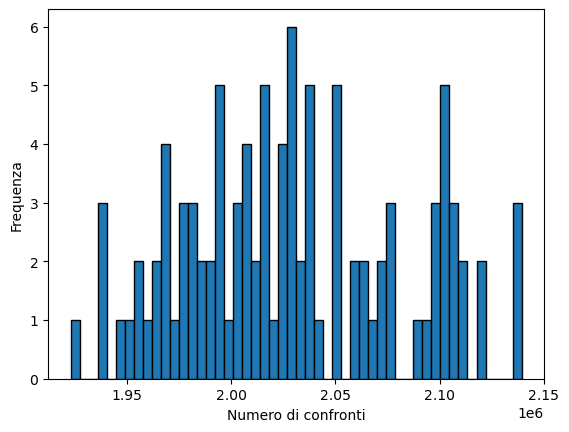

In [ ]:
plt.hist(Xr, edgecolor="black", bins=50)
plt.xlabel("Numero di confronti")
plt.ylabel("Frequenza")
plt.show()

In [ ]:
v1 = 2
v2 = 3

In [ ]:
def markov(mu, val):
  return mu/(val*mu)

In [ ]:
print(markov(val_medio, v1))
print(markov(val_medio, v2))

0.5
0.3333333333333333


In [ ]:
def chebyshev(mu, val, dev):
    return dev / (((val-1)**2)*(mu**2))

In [ ]:
print(chebyshev(val_medio, v1, dev_standard))
print(chebyshev(val_medio, v2, dev_standard))

0.039854077211853085
0.009963519302963271
